In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [13]:
import sklearn
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from sklearn import metrics 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from keras.optimizers import SGD
music_data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Data/features_30_sec.csv')

In [21]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from xgboost import XGBClassifier
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelEncoder
df = music_data
df = df.set_index(df['filename'])
df = df.drop(['filename'], axis = 1)
df = df.drop(['length','rms_var',
              'zero_crossing_rate_var','harmony_mean',
              'perceptr_mean'], axis=1)
y = df['label']
df = df.drop(['label'], axis=1)
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
# print(scaled_df)
features = scaled_df
# one-hot encoding of labels
cols = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
features, y, test_size=.25, random_state=42)


In [48]:
# XGBoost
params = {'n_estimators': [200, 400, 500, 600, 800, 900, 1200], 'max_depth': [3, 4, 5]}
model = XGBClassifier(objective = 'softmax', num_class = 10, random_state=42)
# Grid Search
model_cv = GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, cv=3)
model_cv.fit(X_train, y_train)
best_params = model_cv.best_params_
print("The best parameters are:", best_params)
#clf = XGBClassifier(colsample_bytree = 0.6, gamma= 0.5, max_depth= 3, min_child_weight= 1, subsample= 0.6, objective = 'softmax', num_class = 10, random_state=42)
clf = XGBClassifier(**best_params, objective = 'softmax', num_class = 10, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy of the classifier is:", accuracy_score(y_test,y_pred))
acc_train = clf.score(X_train, y_train)
print("Accuracy on train = %0.4f " % acc_train)
acc_test = clf.score(X_test, y_test)
print("Accuracy on test = %0.4f " % acc_test)

The best parameters are: {'max_depth': 5, 'n_estimators': 400}
Accuracy of the classifier is: 0.668
Accuracy on train = 0.9987 
Accuracy on test = 0.6680 


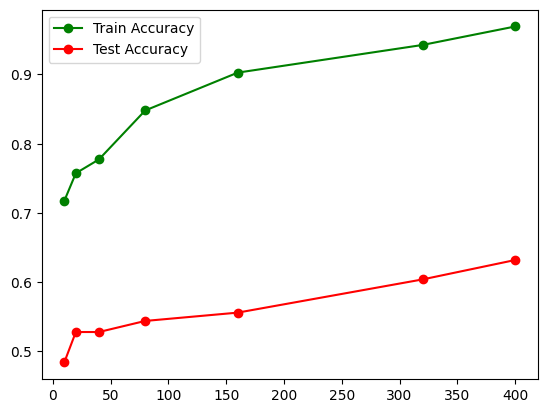

In [37]:
m = [10, 20, 40, 80, 160, 320, 400]
scores = []
scores2 = []
for n in m:
    model_xgb = XGBClassifier(n_estimators=n, learning_rate=.01, max_depth = 3)
    model_xgb.fit(X_train, y_train)
    scores.append(model_xgb.score(X_train, y_train))
    scores2.append(model_xgb.score(X_test, y_test))
plt.plot(m, scores, 'o-', label='Train Accuracy', color = 'g')
plt.plot(m, scores2, 'o-', label='Test Accuracy', color = 'r')
plt.legend()
plt.show()

In [30]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

params = {'min_samples_leaf': np.arange(1, 10), 'max_depth': np.arange(1,10)}
model = DecisionTreeClassifier(random_state = 42)
model_cv = GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, cv=3)
model_cv.fit(X_train, y_train)
best_params = model_cv.best_params_
print("The best parameters are:", best_params)
clf = DecisionTreeClassifier(**best_params, criterion = 'log_loss', random_state = 42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
pred = clf.predict_proba(X_test)
acc_train = clf.score(X_train, y_train)
print("Accuracy on train = %0.4f " % acc_train)
acc_test = clf.score(X_test, y_test)
print("Accuracy on test = %0.4f " % acc_test)

The best parameters are: {'max_depth': 9, 'min_samples_leaf': 2}
Accuracy on train = 0.9200 
Accuracy on test = 0.4360 


In [38]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest
params = { 'n_estimators': [200, 400, 600, 800],'max_features': ['auto', 'sqrt', 'log2'],'max_depth' : [4,5,6,7,8]}
#model = RandomForestClassifier(random_state=42, criterion = 'log_loss')
#model_cv = GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, cv=3)
#model_cv.fit(X_train, y_train)
#best_params = model_cv.best_params_
#print("The best parameters are:", best_params)
clf = RandomForestClassifier(max_features= 'log2', n_estimators = 800, max_depth = 5, criterion = 'log_loss', random_state = 42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
pred = clf.predict_proba(X_test)
acc_train = clf.score(X_train, y_train)
print("Accuracy on train = %0.4f " % acc_train)
acc_test = clf.score(X_test, y_test)
print("Accuracy on test = %0.4f " % acc_test)

The best parameters are: {'max_depth': 7, 'max_features': 'log2', 'n_estimators': 800}
Accuracy on train = 0.9973 
Accuracy on test = 0.6600 


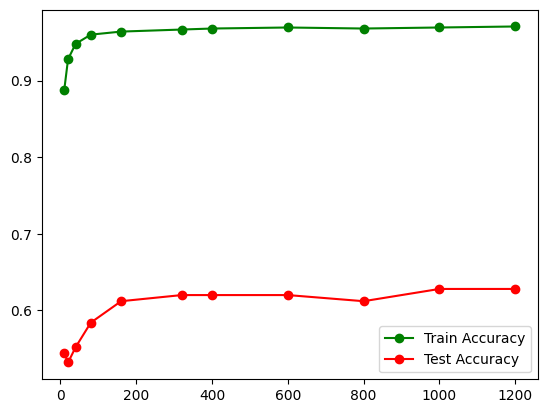

In [42]:
m = [10, 20, 40, 80, 160, 320, 400, 600, 800, 1000, 1200]
scores = []
scores2 = []
for n in m:
    clf = RandomForestClassifier(max_features= 'log2', n_estimators = n, max_depth = 6, criterion = 'log_loss', random_state = 42)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_train, y_train))
    scores2.append(clf.score(X_test, y_test))
plt.plot(m, scores, 'o-', label='Train Accuracy', color = 'g')
plt.plot(m, scores2, 'o-', label='Test Accuracy', color = 'r')
plt.legend()
plt.show()

In [47]:
import catboost as cb
# Cat Boost
clf = cb.CatBoostClassifier(verbose=0, eval_metric='Accuracy', loss_function='MultiClass')
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
print(accuracy_score(y_test, preds))

0.696


In [51]:
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
#MLP
# from https://www.geeksforgeeks.org/music-genre-classifier-using-machine-learning/#
model = Sequential()
  
model.add(Flatten(input_shape=(53,)))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 53)                0         
                                                                 
 dense_3 (Dense)             (None, 256)               13824     
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                      

In [52]:
model.compile(optimizer='adam',
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])
  
hist = model.fit(X_train, y_train,
                 validation_data = (X_test,y_test),
                 epochs = 100,
                 batch_size = 32)

Epoch 1/100
24/24 [==============================] - 2s 11ms/step - loss: 1.8404 - accuracy: 0.3653 - val_loss: 2.2491 - val_accuracy: 0.0880
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1917 - accuracy: 0.5747 - val_loss: 2.1831 - val_accuracy: 0.1440
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 0.9891 - accuracy: 0.6560 - val_loss: 2.1083 - val_accuracy: 0.1440
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 0.8755 - accuracy: 0.7067 - val_loss: 2.0200 - val_accuracy: 0.2280
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 0.7939 - accuracy: 0.7280 - val_loss: 1.9114 - val_accuracy: 0.3880
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7274 - accuracy: 0.7520 - val_loss: 1.8092 - val_accuracy: 0.4560
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6633 - accuracy: 0.7640 - val_loss: 1.7348 - val_accuracy: 0.5200
Epoch 8/100


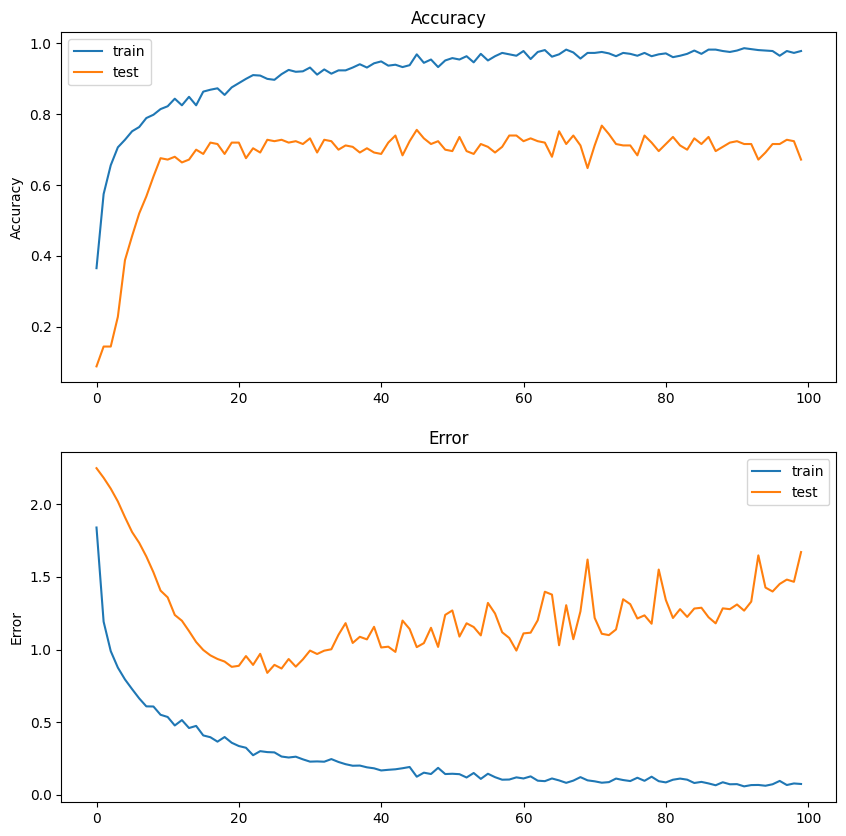

In [53]:
fig, axs = plt.subplots(2,figsize=(10,10))
  
# accuracy 
axs[0].plot(hist.history["accuracy"], label="train")
axs[0].plot(hist.history["val_accuracy"], label="test")    
axs[0].set_ylabel("Accuracy")
axs[0].legend()
axs[0].set_title("Accuracy")
      
# Error 
axs[1].plot(hist.history["loss"], label="train")
axs[1].plot(hist.history["val_loss"], label="test")    
axs[1].set_ylabel("Error")
axs[1].legend()
axs[1].set_title("Error")
      
plt.show()

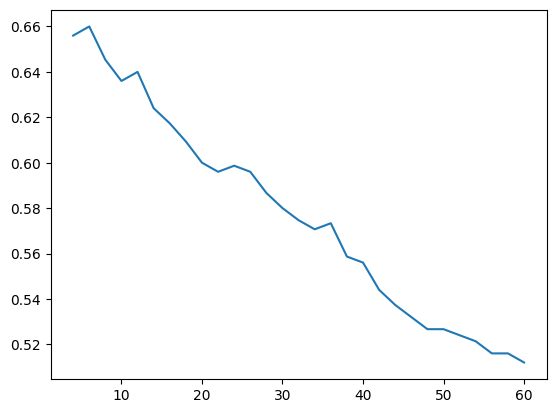

In [56]:
# K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
m = np.arange(4, 61, 2)
scores = []
for n in m:
  knn = KNeighborsClassifier(n_neighbors=n)
  cv_scores = cross_val_score(knn, X_train, y_train, cv=10)
  scores.append(np.mean(cv_scores))
plt.plot(m, scores)



In [57]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
pred = lm.predict_proba(X_test)
acc_train = lm.score(X_train, y_train)
print("Accuracy on train = %0.4f " % acc_train)
acc_test = lm.score(X_test, y_test)
print("Accuracy on test = %0.4f " % acc_test)

Accuracy on train = 0.7253 
Accuracy on test = 0.5440 
